# Python - Week 7 - CS
## Shahin Mammadov

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("Country-data.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
countries = data['country']
features = data.drop(columns=['country'])

In [5]:
pd.isnull(features).sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
features[features.duplicated()]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


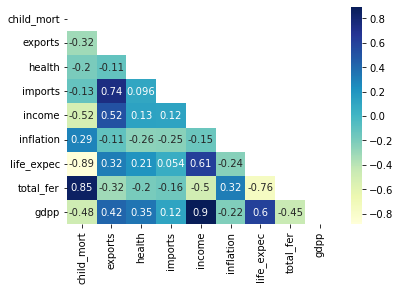

In [7]:
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(features.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
mp.show()

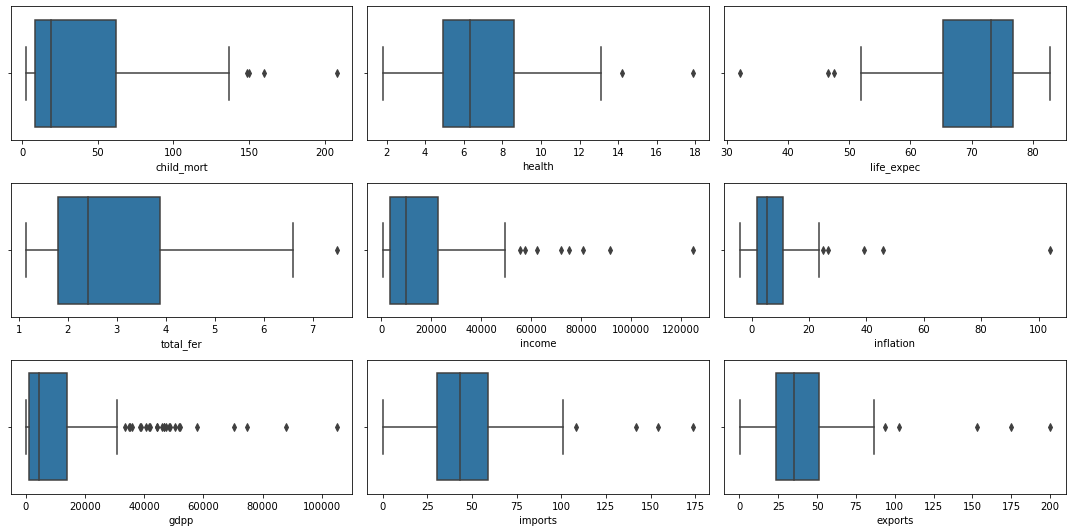

In [8]:
fig, axs = mp.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(x=features['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(x=features['health'], ax = axs[0,1])
plt3 = sns.boxplot(x=features['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(x=features['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(x=features['income'], ax = axs[1,1])
plt6 = sns.boxplot(x=features['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(x=features['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(x=features['imports'], ax = axs[2,1])
plt9 = sns.boxplot(x=features['exports'], ax = axs[2,2])

mp.tight_layout()

In [9]:
scaler = StandardScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])

In [10]:
features

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

In [11]:
pca = PCA(n_components=1, random_state=42)

In [12]:
social_score=["child_mort", "health", "life_expec", "total_fer"]
economy_score=["exports", "imports", "income", "inflation", "gdpp"]

In [13]:
soc_column=['social_score']
eco_column=['economical_score']
pca_social=pca.fit_transform(data[social_score])
pca_economy=pca.fit_transform(data[economy_score])

In [14]:
pca_social=pd.DataFrame(data=pca_social, columns=soc_column)
pca_economy=pd.DataFrame(data=pca_economy, columns=eco_column)

In [15]:
pca_social

,social_score
0,53.775644
1,-22.396407
2,-11.873049
3,81.332823
4,-28.648209
...,...
162,-7.391363
163,-21.684053
164,-15.202057
165,18.345675


In [16]:
pca_data = pd.concat([pca_economy, pca_social, data["country"]], axis=1)

In [17]:
pca_data.head()

,economical_score,social_score,country
0,-19815.089842,53.775644,Afghanistan
1,-11338.961748,-22.396407,Albania
2,-8926.365857,-11.873049,Algeria
3,-14652.403430,81.332823,Angola
4,896.118375,-28.648209,Antigua and Barbuda


## K-means

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(features)
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [19]:
data['K_means'] = y_kmeans

In [20]:
data[data['K_means']==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0


In [21]:
data[data['K_means']==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1


In [22]:
data[data['K_means']==2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2


**Looking at the data, we can agree that, 1st clustered group is developed countries, 2nd clustered group is under developed, and 3rd clustered group is developing countries.**

In [23]:
data['K_means'].replace({0: "Developed", 1: "Under_developed", 2: "Developing"}, inplace=True)

In [24]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Under_developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under_developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing


## Hierarchial

In [25]:
import scipy.cluster.hierarchy as sch

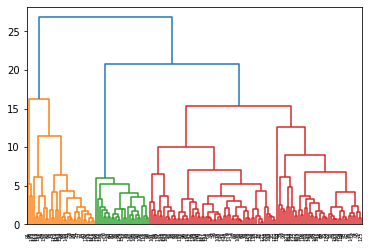

In [26]:
dendogram=sch.dendrogram(sch.linkage(features,method='ward'))

In [27]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(features)
y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [28]:
data['Hierarchial'] = y_hc

In [29]:
data[data['Hierarchial']==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means,Hierarchial
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Developed,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Developed,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,Developed,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,Developed,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,Developed,0


In [30]:
data[data['Hierarchial']==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means,Hierarchial
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under_developed,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,Developing,1


In [31]:
data[data['Hierarchial']==2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means,Hierarchial
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Under_developed,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Under_developed,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Under_developed,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Under_developed,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,Under_developed,2


In [32]:
data['Hierarchial'].replace({0: "Developed", 2: "Under_developed", 1: "Developing"}, inplace=True)

In [33]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means,Hierarchial
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Under_developed,Under_developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under_developed,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developing


### Connect all together

In [34]:
pca_data = pd.concat([pca_economy, pca_social, data[["country", "K_means", "Hierarchial"]]], axis=1)

In [35]:
pca_data.head(20)

,economical_score,social_score,country,K_means,Hierarchial
0,-19815.089842,53.775644,Afghanistan,Under_developed,Under_developed
1,-11338.961748,-22.396407,Albania,Developing,Developing
2,-8926.365857,-11.873049,Algeria,Developing,Developing
3,-14652.403430,81.332823,Angola,Under_developed,Developing
4,896.118375,-28.648209,Antigua and Barbuda,Developing,Developing
5,-699.719990,-24.357062,Argentina,Developing,Developing
6,-14283.966224,-20.314376,Armenia,Developing,Developing
7,44372.688780,-35.090638,Australia,Developed,Developed
8,42246.327390,-35.336436,Austria,Developed,Developed
9,-5725.514149,1.174223,Azerbaijan,Developing,Developing
